In [32]:
using Plots
using CSV
using DataFrames
using StatsBase

In [33]:
fig_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/figures"

"/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/figures"

## Sim Data 

In [34]:
# sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0524_batch_00_00.csv" # low variability experiment 

sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/05_27_batch_00_01.csv" # best data 
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))

# sim_data[!, "x1"]

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.0e31
2,1.69693e9,2.78124e9,3.97385e9,5.27477e9,6.68401e9,8.20156e9,9.82742e9,1.0e31
3,2.10339e9,3.41931e9,4.84898e9,6.39236e9,8.04947e9,9.82031e9,1.17049e10,1.0e31
4,1.70583e9,2.80985e9,4.03302e9,5.37533e9,6.83678e9,8.41738e9,1.01171e10,1.0e31
5,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.0e31
6,2.011e9,3.12534e9,4.24803e9,5.38289e9,6.53377e9,7.70448e9,8.89887e9,1.0e31
7,1.60914e9,2.50255e9,3.40554e9,4.32255e9,5.25796e9,6.21618e9,7.20163e9,1.0e31
8,1.8101e9,2.8141e9,3.8273e9,4.85388e9,5.89808e9,6.96409e9,8.05615e9,1.0e31
9,1.81005e9,2.81378e9,3.82628e9,4.85156e9,5.89365e9,6.95658e9,8.04436e9,1.0e31


In [35]:
d = Matrix(sim_data)

12×100 Matrix{Float64}:
 1.71028e9  2.82415e9  4.0626e9   …  3.05839e10  3.47662e10  3.90731e10
 1.69693e9  2.78124e9  3.97385e9     2.74552e10  3.12077e10  3.50686e10
 2.10339e9  3.41931e9  4.84898e9     3.01475e10  3.42651e10  3.84963e10
 1.70583e9  2.80985e9  4.03302e9     2.9541e10   3.358e10    3.77382e10
 1.71028e9  2.82415e9  4.0626e9      3.05839e10  3.47662e10  3.90731e10
 2.011e9    3.12534e9  4.24803e9  …  2.21946e10  2.51211e10  2.81546e10
 1.60914e9  2.50255e9  3.40554e9     2.26373e10  2.56148e10  2.87151e10
 1.8101e9   2.8141e9   3.8273e9      2.27646e10  2.57621e10  2.88771e10
 1.81005e9  2.81378e9  3.82628e9     2.20672e10  2.49738e10  2.79926e10
 1.70588e9  2.81017e9  4.03403e9     3.02384e10  3.43683e10  3.86227e10
 1.90238e9  3.10743e9  4.4262e9   …  2.93228e10  3.33295e10  3.74498e10
 1.90683e9  3.12173e9  4.45579e9     3.03657e10  3.45157e10  3.87847e10

In [36]:
# drop columns with entries > 10e15
bad_ix = findall(x->x>10e15, d[1,:])
bad_ix
dg = d[:, Not(collect(bad_ix))]
dg
# yg = y[Not(collect(bad_ix))]

12×90 Matrix{Float64}:
 1.71028e9  2.82415e9  4.0626e9   …  3.05839e10  3.47662e10  3.90731e10
 1.69693e9  2.78124e9  3.97385e9     2.74552e10  3.12077e10  3.50686e10
 2.10339e9  3.41931e9  4.84898e9     3.01475e10  3.42651e10  3.84963e10
 1.70583e9  2.80985e9  4.03302e9     2.9541e10   3.358e10    3.77382e10
 1.71028e9  2.82415e9  4.0626e9      3.05839e10  3.47662e10  3.90731e10
 2.011e9    3.12534e9  4.24803e9  …  2.21946e10  2.51211e10  2.81546e10
 1.60914e9  2.50255e9  3.40554e9     2.26373e10  2.56148e10  2.87151e10
 1.8101e9   2.8141e9   3.8273e9      2.27646e10  2.57621e10  2.88771e10
 1.81005e9  2.81378e9  3.82628e9     2.20672e10  2.49738e10  2.79926e10
 1.70588e9  2.81017e9  4.03403e9     3.02384e10  3.43683e10  3.86227e10
 1.90238e9  3.10743e9  4.4262e9   …  2.93228e10  3.33295e10  3.74498e10
 1.90683e9  3.12173e9  4.45579e9     3.03657e10  3.45157e10  3.87847e10

In [37]:
dgdf = DataFrame(dg, :auto)

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.4109e10
2,1.69693e9,2.78124e9,3.97385e9,5.27477e9,6.68401e9,8.20156e9,9.82742e9,1.34041e10
3,2.10339e9,3.41931e9,4.84898e9,6.39236e9,8.04947e9,9.82031e9,1.17049e10,1.58152e10
4,1.70583e9,2.80985e9,4.03302e9,5.37533e9,6.83678e9,8.41738e9,1.01171e10,1.3874e10
5,1.71028e9,2.82415e9,4.0626e9,5.4256e9,6.91317e9,8.52528e9,1.0262e10,1.4109e10
6,2.011e9,3.12534e9,4.24803e9,5.38289e9,6.53377e9,7.70448e9,8.89887e9,1.1374e10
7,1.60914e9,2.50255e9,3.40554e9,4.32255e9,5.25796e9,6.21618e9,7.20163e9,9.27181e9
8,1.8101e9,2.8141e9,3.8273e9,4.85388e9,5.89808e9,6.96409e9,8.05615e9,1.03352e10
9,1.81005e9,2.81378e9,3.82628e9,4.85156e9,5.89365e9,6.95658e9,8.04436e9,1.03106e10


## History Data

In [38]:
hist_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/hist_data/elect.csv"
hist_data = DataFrame(CSV.File(hist_data_path; drop=[1]))

# hist_data[!, "0"]

,0
,Float64
1,4.96949e10
2,4.85494e10
3,4.47668e10
4,4.49106e10
5,5.42743e10
6,4.16979e10
7,4.09721e10
8,4.14693e10
9,4.1515e10


In [39]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

12-element Vector{String}:
 "Jan"
 "Feb"
 "Mar"
 "Apr"
 "May"
 "June"
 "Jul"
 "Aug"
 "Sep"
 "Oct"
 "Nov"
 "Dec"

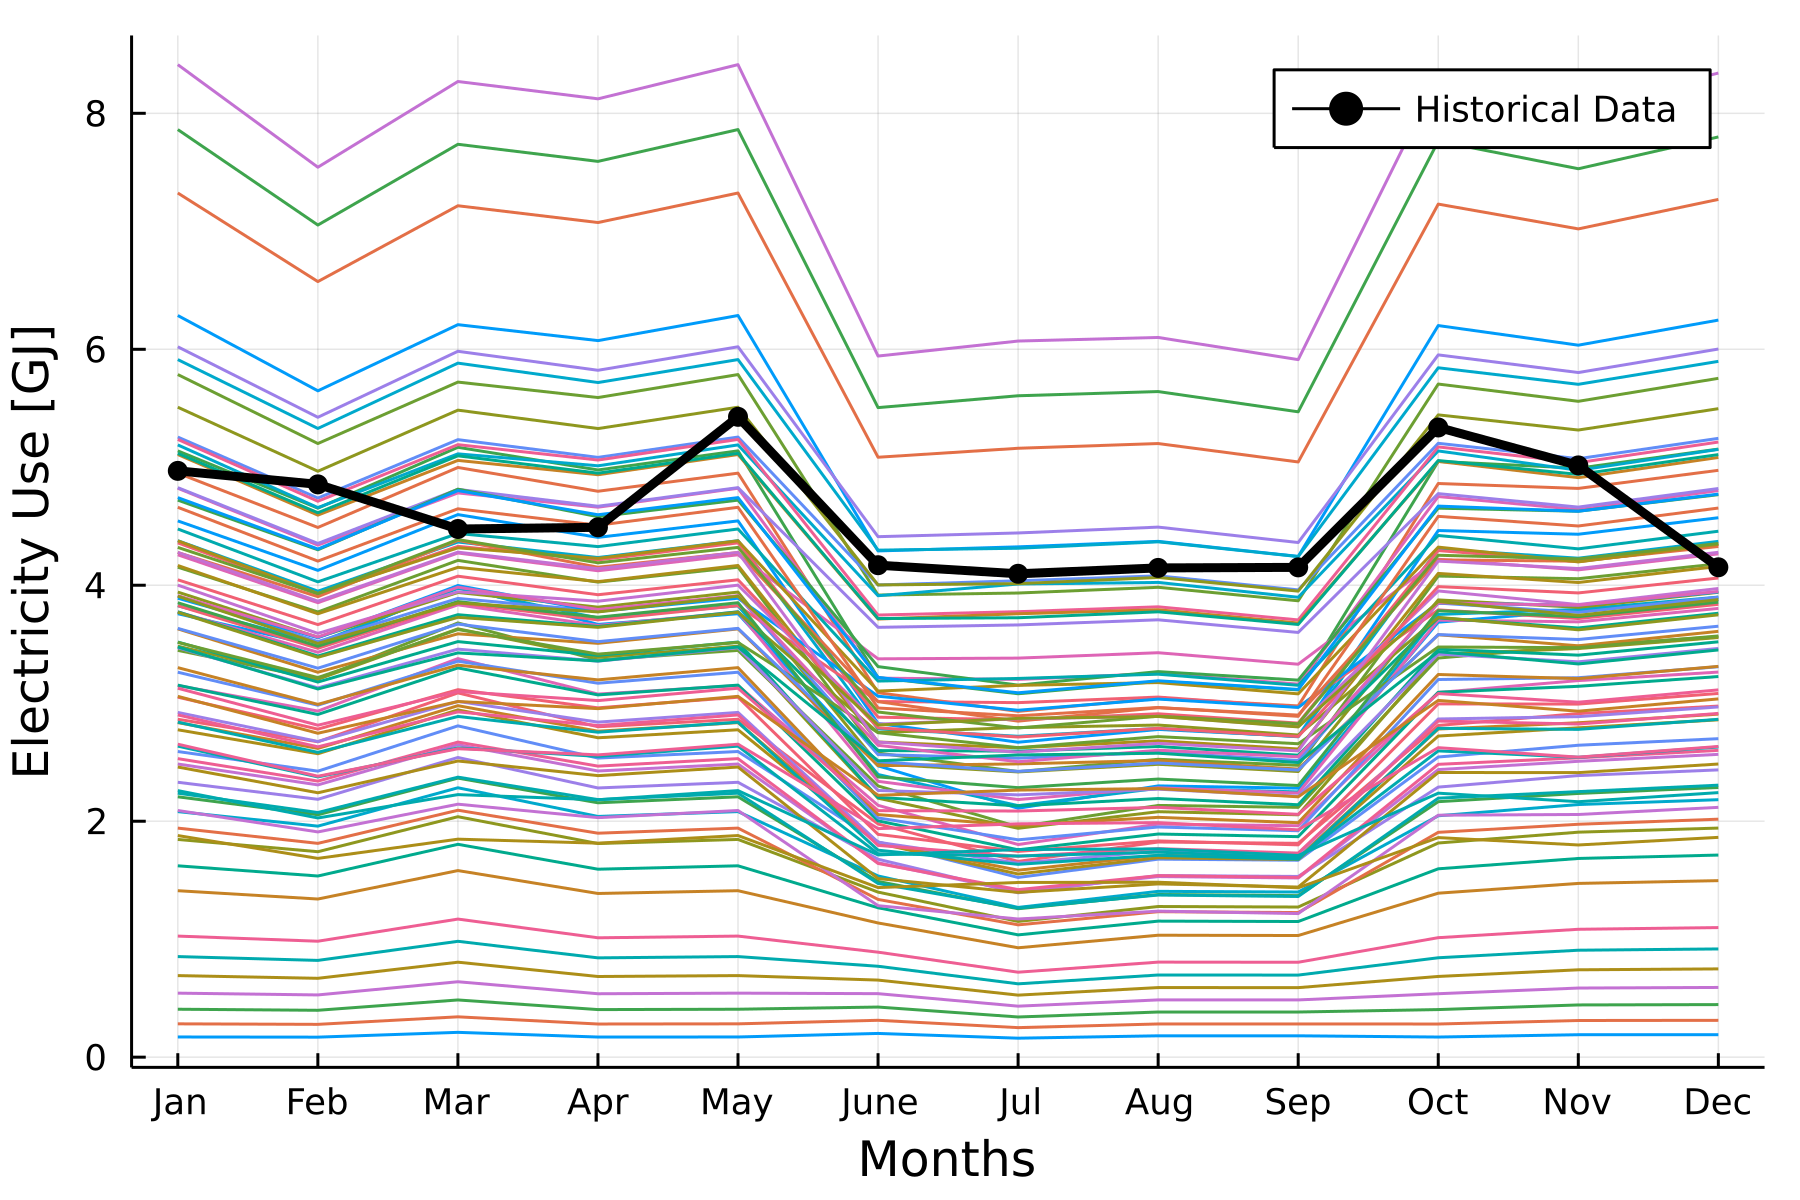

In [47]:
plot()
for i = 1:size(dgdf)[2]
    plot!(months, dgdf[!, "x$i"]./10e9, label="")
end

plot!(months, hist_data[!, "0"]./10e9, linewidth=3, linestyle = :solid, linecolor=:black,
markershape= :circle, markercolor= :black, markersize=4,
label="Historical Data", xlabel="Months", ylabel="Electricity Use [GJ]", leg=true, dpi=300)

In [41]:
savefig("$fig_path/surr2.png")

# RMSE

In [42]:
Y = Matrix(sim_data)
h = Matrix(hist_data)

12×1 Matrix{Float64}:
 4.969488797635679e10
 4.854941092244163e10
 4.4766776221326004e10
 4.491060873281641e10
 5.4274283592166794e10
 4.169789752583157e10
 4.0972087017759636e10
 4.14692987493636e10
 4.15149885016308e10
 5.337295014723481e10
 5.0157244633798836e10
 4.1521494332559616e10

In [43]:
y = []
for i=1:size(Y,2)
    append!(y, rmsd(Y[:, i], h, normalize=false))
end
y

100-element Vector{Any}:
 4.4523997847285225e10
 4.342174110016763e10
 4.2234986212837654e10
 4.096270333823107e10
 3.960402233231432e10
 3.81582609573303e10
 3.662493387046261e10
 1.0e31
 3.3294978152472824e10
 3.149892693323965e10
 ⋮
 8.229286351276589e9
 1.409671244598637e10
 1.0865665731933071e10
 2.9260156240611797e10
 2.586654721500374e10
 2.2592316899777824e10
 1.906073075911188e10
 1.5457534075836554e10
 1.1825133296498781e10

In [44]:
hgj = h./10e9 # GJ 

12×1 Matrix{Float64}:
 4.9694887976356785
 4.854941092244163
 4.4766776221326
 4.491060873281641
 5.427428359216679
 4.169789752583157
 4.097208701775964
 4.14692987493636
 4.15149885016308
 5.337295014723481
 5.015724463379883
 4.152149433255961

In [45]:
Ygj = Y./10e9


12×100 Matrix{Float64}:
 0.171028  0.282415  0.40626   …  2.65261  3.05839  3.47662  3.90731
 0.169693  0.278124  0.397385     2.3811   2.74552  3.12077  3.50686
 0.210339  0.341931  0.484898     2.61437  3.01475  3.42651  3.84963
 0.170583  0.280985  0.403302     2.56211  2.9541   3.358    3.77382
 0.171028  0.282415  0.40626      2.65261  3.05839  3.47662  3.90731
 0.2011    0.312534  0.424803  …  1.93709  2.21945  2.51211  2.81546
 0.160914  0.250255  0.340554     1.97782  2.26373  2.56148  2.87151
 0.18101   0.28141   0.38273      1.98804  2.27646  2.57621  2.88771
 0.181005  0.281378  0.382628     1.92687  2.20672  2.49738  2.79926
 0.170588  0.281017  0.403403     2.62327  3.02384  3.43683  3.86227
 0.190238  0.310743  0.44262   …  2.54298  2.93228  3.33295  3.74498
 0.190683  0.312173  0.445579     2.63349  3.03657  3.45157  3.87847

In [46]:
ygj = []
for i=1:size(Ygj,2)
    append!(ygj, rmsd(Ygj[:, i], hgj, normalize=false))
end
ygj

100-element Vector{Any}:
 4.452399784728522
 4.342174110016764
 4.223498621283765
 4.096270333823107
 3.9604022332314317
 3.81582609573303
 3.6624933870462613
 1.0e21
 3.329497815247282
 3.149892693323965
 ⋮
 0.8229286351276589
 1.409671244598637
 1.0865665731933072
 2.9260156240611797
 2.586654721500374
 2.2592316899777827
 1.9060730759111881
 1.5457534075836554
 1.1825133296498782

In [29]:
minimum(ygj)

0.4097845561555082